In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## The Teacher's Defense ##

In [2]:
# Run this cell
scores = Table.read_table('data/scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [3]:
# Determine the number of students in each section by using
# .group
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [4]:
# Find the average score for each section
scores.group('Section', np.average)

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [5]:
# The observed/actual average for the section we are 
# interested in is 13.667.  Assign this to an assignment
# statement `observed_average`
observed_average = 13.667

In [6]:
# Assign to `random_sample` a sample of size 27 from the 
# table `scores`.  This sample should be without replacement
random_sample = scores.sample(27, with_replacement=False)
random_sample

Section,Midterm
3,4
4,24
3,23
11,13
2,17
1,14
4,13
10,14
2,0
3,22


In [9]:
# Find the average of midterm grades generate and assigned to
# `random_sample`
np.average(random_sample.column('Midterm'))

14.25925925925926

In [10]:
# Write a function  under the hypothesis called `random_sample_midterm_avg` to
# simulate one value of the test statistic that
# the section is like a random sample from the class
# The function does not take a value (ie. use ())
# You want to sample the table scores, with a sample size of 27, and without replacement
# assign this to `random_sample`
# Return the average of the midterm grades of simulated sample
# Hint:  You will use code that you have already created in this notebook

def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement=False)
    return np.average(random_sample.column('Midterm'))

In [11]:
# Use a for loop to simulate 50,000 copies of the test statistic

# Create an assignment statement called `sample_averages` that
# is an "empty" array
# Create a for loop that runs up to 50,000 times
# Within the for loop, there is an assignment statement called
# `sample_averages` that is assigned the result of 
# appending to `sample_averages the results from 
# using the function `random_sample_midterm_avg()`

sample_averages = make_array()

for i in np.arange(50000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg()) 

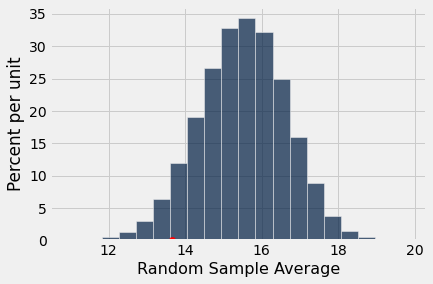

In [12]:
# Run this cell
# This code compares the simulated distribution of the statistic
# and the actual observed statistic

averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(observed_average, 0, color = 'red', s=40);

In [14]:
# Calculate how many simulated statistics were more extreme
# than the observed statistic, as a percentage of the total
# We call this the p-value
# If the p-value is greater than the significance level of 5%
# we would fail to reject the null hypothesis

# Hint: compare the values of `sample_averages` to the values of `observed_average`
# one should be less than or equal to the other
# add up all of the times the above statement is true and divide by the total nummber of trials

sum(sample_averages <= observed_average) / 50000

0.058119999999999998

In [15]:
# How low did the average score need to be to reject the null?
# Well, 5% of 50,000 = 2500. Let's sort the simulated averages
# and look at the 2500th item in the array. That's the score 
# right at the decision point

# Run this cell

five_percent_point = averages_tbl.sort(0).column(0).item(2500)
five_percent_point

# This is using the Critical value approach to make a decision 
# 13.59 is our critical value.  Test score averages below this value are in the rejection region and are 
# not likely to occur
# our observed value is 13.6667 which is slightly above this critical value
# we would fail to reject the null because our observed value is not in the rejection region

13.592592592592593

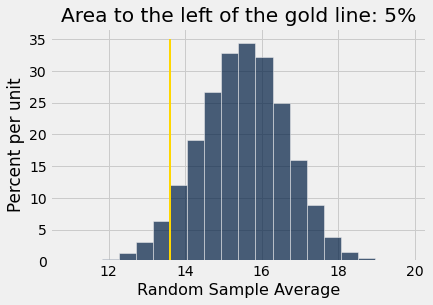

In [16]:
# Run this cell
# This code will visualize the 5% mark on the distribution
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');